In [17]:

%pip install playsound

%pip install -U pyobjc


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7019 sha256=f037f2c2b6ce105fae091226be3ca7fb09dc9b6f59c91c7dcc5cc077fcdebe0a
  Stored in directory: /Users/sunny-macbook-air/Library/Caches/pip/wheels/50/98/42/62753a9e1fb97579a0ce2f84f7db4c21c09d03bb2091e6cef4
Successfully built playsound
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.6/738.6 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.2/391.2 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

Found 3400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                       

/var/folders/n1/1mpptrpx13lcpsw2yvffww040000gn/T/ipykernel_80524/1252261280.py:84: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,


106/106 [==============================] - ETA: 0s - loss: 0.3149 - accuracy: 0.8524
Epoch 1: val_accuracy improved from -inf to 0.99306, saving model to yawn_detection.h5
106/106 [==============================] - 18s 170ms/step - loss: 0.3149 - accuracy: 0.8524 - val_loss: 0.0175 - val_accuracy: 0.9931
Epoch 2/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


106/106 [==============================] - ETA: 0s - loss: 0.0614 - accuracy: 0.9798
Epoch 2: val_accuracy improved from 0.99306 to 1.00000, saving model to yawn_detection.h5
106/106 [==============================] - 22s 205ms/step - loss: 0.0614 - accuracy: 0.9798 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3/20
106/106 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9884
Epoch 3: val_accuracy did not improve from 1.00000
106/106 [==============================] - 18s 172ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4/20
106/106 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9947
Epoch 4: val_accuracy did not improve from 1.00000
106/106 [==============================] - 14s 134ms/step - loss: 0.0187 - accuracy: 0.9947 - val_loss: 3.6814e-04 - val_accuracy: 1.0000
Epoch 5/20
106/106 [==============================] - ETA: 0s - loss: 0.0380 - accuracy: 0.9869
Epoch 5: val_accuracy did not

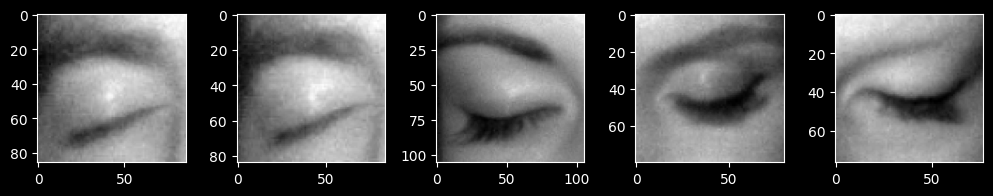

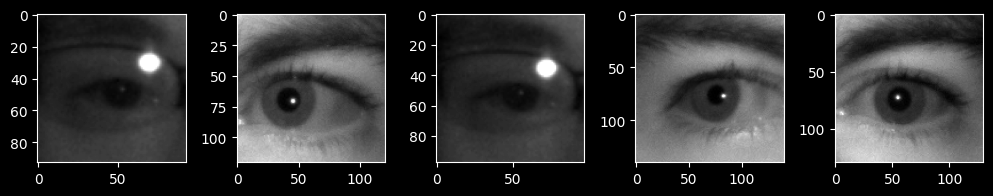

In [18]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]

    plt.figure(figsize=(20, 20))

    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)

        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')

data_path = 'eyes/dataset/train'

directories = ['/Closed_Eyes', '/Open_Eyes']

for j in directories:
    plot_imgs(data_path+j)

batch_size = 32
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  rescale = 1./255,
                                  zoom_range = 0.2,
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_data_path = 'eyes/dataset/train'
test_data_path = 'eyes/dataset/test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (64,64),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (64,64),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical')

classes = 2

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

model_path="yawn_detection.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1,
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

num_epochs = 20
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

history = model.fit_generator(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

In [19]:
import dlib
import cv2

def detect_and_crop_eyes(image_path):
    # 이미지 읽기
    image = cv2.imread(image_path)

    # dlib 얼굴 검출기 초기화
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # 얼굴 랜드마크 예측기

    # 그레이 스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = detector(gray)

    for face in faces:
        # 랜드마크 예측
        landmarks = predictor(gray, face)

        # 왼쪽 눈 좌표
        left_eye_start = landmarks.part(36).x, landmarks.part(36).y
        left_eye_end = landmarks.part(39).x, landmarks.part(39).y

        # 오른쪽 눈 좌표
        right_eye_start = landmarks.part(42).x, landmarks.part(42).y
        right_eye_end = landmarks.part(45).x, landmarks.part(45).y
        print(left_eye_start)
        print(left_eye_end)
        print(right_eye_start)
        print(right_eye_end)
        print("우엥")

        # 눈을 각각의 좌표로 자르기
        left_eye_image = image[left_eye_start[1]:left_eye_end[1], left_eye_start[0]:left_eye_end[0]]
        right_eye_image = image[right_eye_end[1]:right_eye_start[1], right_eye_start[0]:right_eye_end[0]]

        print(left_eye_image)
        print("헤헤")
        print(right_eye_image)


        # 왼쪽 눈 이미지 파일로 저장
        cv2.imwrite('left_eye.png', left_eye_image)

        # 오른쪽 눈 이미지 파일로 저장
        cv2.imwrite('right_eye.png', right_eye_image)

# 함수 호출
detect_and_crop_eyes('sleep.png')

(170, 268)
(228, 269)
(315, 269)
(375, 266)
우엥
[[[ 76  69 104]
  [ 72  64  99]
  [ 69  61  95]
  [ 70  61  95]
  [ 72  63  97]
  [ 70  61  95]
  [ 66  57  91]
  [ 63  54  87]
  [ 62  53  86]
  [ 62  53  85]
  [ 64  55  88]
  [ 70  61  93]
  [ 77  68 100]
  [ 84  75 107]
  [ 90  81 113]
  [ 93  85 117]
  [ 95  87 119]
  [100  91 124]
  [103  95 128]
  [104  96 130]
  [105  97 131]
  [108  99 133]
  [106  98 132]
  [106  98 132]
  [106  98 132]
  [110 102 136]
  [110 102 136]
  [108  99 134]
  [105  96 130]
  [105  96 130]
  [102  93 128]
  [100  91 125]
  [ 97  88 122]
  [ 92  83 117]
  [ 88  79 114]
  [ 85  76 110]
  [ 83  74 108]
  [ 80  71 106]
  [ 74  65 100]
  [ 67  58  93]
  [ 62  53  87]
  [ 63  54  88]
  [ 65  56  90]
  [ 64  55  89]
  [ 59  50  85]
  [ 57  48  82]
  [ 58  49  83]
  [ 60  51  86]
  [ 63  54  88]
  [ 65  56  90]
  [ 64  56  90]
  [ 65  59  93]
  [ 66  60  94]
  [ 71  64  99]
  [ 75  68 103]
  [ 77  70 106]
  [ 80  75 110]
  [ 91  85 121]]]
헤헤
[[[ 91  86 120]
  [ 

In [20]:
from keras.preprocessing import image
import numpy as np
from playsound import playsound
import time

# 알람을 재생하는 함수
def play_alarm_sound():
  print("알람 소리를 재생합니다.")
  playsound("alarm.mp3")

# 이미지 경로
image_path = ['left_eye.png', 'right_eye.png']

# 결과값
results = []

for i in image_path:
  # 이미지 불러오기
  img = image.load_img(i, target_size=(64, 64), color_mode='grayscale')

  # 이미지를 모델에 입력 가능한 형태로 변환
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.  # 모델 훈련 시 rescale 값과 동일하게 이미지 정규화

  # 모델 예측
  prediction = model.predict(img_array)

  # 예측 결과 출력
  if prediction[0][0] > prediction[0][1]:
      print("눈을 감은 상태입니다.")
      results.append(0)
  else:
      print("눈을 떴습니다.")
      results.append(1)
  print(results)

# 최종 결과
if results[0] == 0 and results[1] == 0:
  print("잔다!!!")
  play_alarm_sound()
else:
  print("공부를 잘하고 있군")

1/1 [==============================] - 0s 94ms/step
눈을 감은 상태입니다.
[0]
1/1 [==============================] - 0s 17ms/step
눈을 감은 상태입니다.
[0, 0]
잔다!!!
알람 소리를 재생합니다.
